Model Accuracy: 0.975


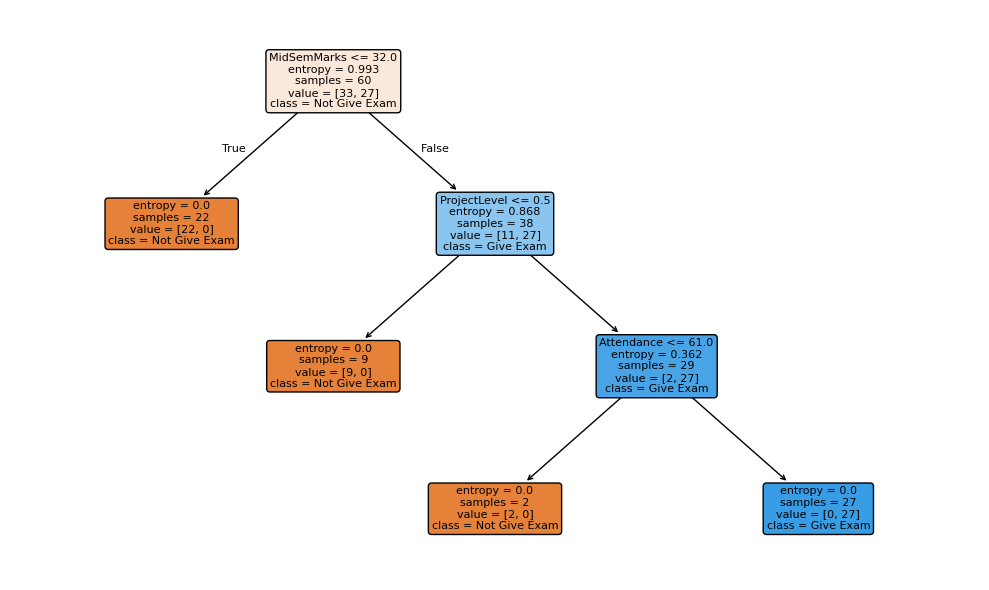

In [5]:
# Implementation of Decision Tree with compact visualization
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data for 100 students
n = 100
mid_sem_marks = np.random.randint(20, 50, size=n)
attendance = np.random.randint(60, 100, size=n)
project_level = np.random.choice(['Low', 'Medium', 'High'], size=n)

# Generate ExamStatus based on a rule
exam_status = []
for i in range(n):
    if mid_sem_marks[i] >= 32 and attendance[i] > 60 and project_level[i] != 'Low':
        exam_status.append('Give Exam')
    else:
        exam_status.append('Not Give Exam')

# Create DataFrame
df = pd.DataFrame({
    'MidSemMarks': mid_sem_marks,
    'Attendance': attendance,
    'ProjectLevel': project_level,
    'ExamStatus': exam_status
})

# Encode categorical features
df['ProjectLevel'] = df['ProjectLevel'].map({'Low': 0, 'Medium': 1, 'High': 2})
df['ExamStatus'] = df['ExamStatus'].map({'Not Give Exam': 0, 'Give Exam': 1})

# Features and target
X = df[['MidSemMarks', 'Attendance', 'ProjectLevel']]
y = df['ExamStatus']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create Decision Tree
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

# Model accuracy
accuracy = clf.score(X_test, y_test)
print("Model Accuracy:", accuracy)

# Visualize the tree (smaller boxes)
plt.figure(figsize=(10, 6))  # smaller figure size
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=['Not Give Exam', 'Give Exam'],
    filled=True,
    fontsize=8,        # smaller font size → smaller boxes
    rounded=True
)
plt.tight_layout()
plt.show()